# Fit Example
This notebook will go through the basic example of fitting data to the loop model. For more detailed information,
checkout the docstrings for each function.

We start with the standard import statements. (matplotlib is not a requirement for this library so it must be installed
separately for this notebook to run).

In [1]:
import numpy as np
import loopfit as lf
import matplotlib.pyplot as plt

%matplotlib inline

First we have to generate some fake data. Lets define the true loop parameters first. Note that we've added distortions
from an IQ mixer as well as gain and phase polynomials introduced by our hypothetical cabling and amplifiers.


In [2]:
true_params = {'f0': 4.0012,  # resonance frequency
               'qi': 100000,  # internal quality factor
               'qc': 30000,  # coupling quality factor
               'xa': 5e-6,  # resonance fractional asymmetry
               'a': 0.8,  # inductive nonlinearity
               'alpha': 1.2,  # IQ mixer amplitude imbalance
               'beta': 0.2,  # IQ mixer phase imbalance
               'gain0': 3.0,  # gain polynomial coefficients
               'gain1': 1000.0,
               'gain2': 500000.0,
               'phase0': 2.0,  # phase polynomial coefficients
               'phase1': -1000.0}

Now we can generate our fake data using the model() function. In a real example we would be starting with this data.

In [3]:
f = np.linspace(4, 4 + 0.002, 1000)
rs = np.random.RandomState(0)
z = lf.model(f, **true_params)
z += rs.normal(0, 0.02, z.shape) + 1j * rs.normal(0, 0.02, z.shape)

Fitting is as simple as generating a guess and then calling the fit.

The nonlinear and imbalance parameters are used to
tell the code that we want to include nonlinearity and the IQ mixer imbalance in the fit.

In [4]:
init_params = lf.guess(f, z.real, z.imag, nonlinear=True)
result = lf.fit(f, z.real, z.imag, nonlinear=True, imbalance=True,
                **init_params)

Plotting the data shows that the fit converged.

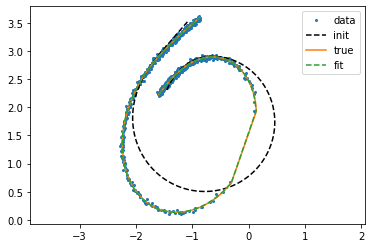

In [5]:
plt.plot(z.real, z.imag, 'o', markersize=2, label='data')


model_init = lf.model(f, **init_params)
plt.plot(model_init.real, model_init.imag, 'k--', label='init')

model = lf.model(f, **true_params)
plt.plot(model.real, model.imag, label='true')

model_fit = lf.model(f, **result)
plt.plot(model_fit.real, model_fit.imag, '--', label='fit')

plt.legend()
plt.axis('equal');

The fit results are close to the true values.

In [6]:
print("parameter       true           fit")
print("------------------------------------------")
for key, value in true_params.items():
    true = f"{value:g}"
    fit = f"{result[key]:g}"
    print(key + ":" + (15 - len(key)) * " " + true + (15 - len(true)) * " " + fit)

parameter       true           fit
------------------------------------------
f0:             4.0012         4.0012
qi:             100000         99045
qc:             30000          30042.5
xa:             5e-06          5.04639e-06
a:              0.8            0.798553
alpha:          1.2            1.20037
beta:           0.2            0.201933
gain0:          3              3.00366
gain1:          1000           992.332
gain2:          500000         465901
phase0:         2              1.99959
phase1:         -1000          -998.295


We can also print the Ceres Solver fit summary.

In [7]:
print(result['summary'])

Solver Summary (v 1.14.0-eigen-(3.3.7)-lapack-suitesparse-(5.7.2)-cxsparse-(3.1.9)-eigensparse-no_openmp-no_tbb)

                                     Original                  Reduced
Parameter blocks                            5                        4
Parameters                                 14                       12
Residual blocks                          1000                     1000
Residuals                                2000                     2000

Minimizer                        TRUST_REGION

Dense linear algebra library            EIGEN
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver                        DENSE_QR                 DENSE_QR
Threads                                     1                        1
Linear solver ordering              AUTOMATIC                        4

Cost:
Initial                          1.106782e+02
Final                            3.809726e-01
Change 